In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LogisticRegression
%matplotlib inline
plt.rcParams["figure.figsize"]=(14,8)
plt.rcParams['figure.dpi']=720
import warnings
warnings.filterwarnings('ignore')

In [13]:
df=pd.read_csv("/content/Titanic_train.csv")

In [14]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [15]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [16]:
df.describe(include=object)

Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top     Braund, Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   577       7        4      644

In [17]:
df.shape

(891, 12)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [20]:
df.duplicated().sum()

0

In [21]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
df


PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [23]:
# drop unnecessary columns

In [24]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin','Sex'],inplace=True)

In [25]:
df

Survived  Pclass   Age  SibSp  Parch     Fare Embarked
0           0       3  22.0      1      0   7.2500        S
1           1       1  38.0      1      0  71.2833        C
2           1       3  26.0      0      0   7.9250        S
3           1       1  35.0      1      0  53.1000        S
4           0       3  35.0      0      0   8.0500        S
..        ...     ...   ...    ...    ...      ...      ...
886         0       2  27.0      0      0  13.0000        S
887         1       1  19.0      0      0  30.0000        S
888         0       3   NaN      1      2  23.4500        S
889         1       1  26.0      0      0  30.0000        C
890         0       3  32.0      0      0   7.7500        Q

[891 rows x 7 columns]

In [26]:
# null values imputations

In [27]:
df.isna().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

<Axes: >

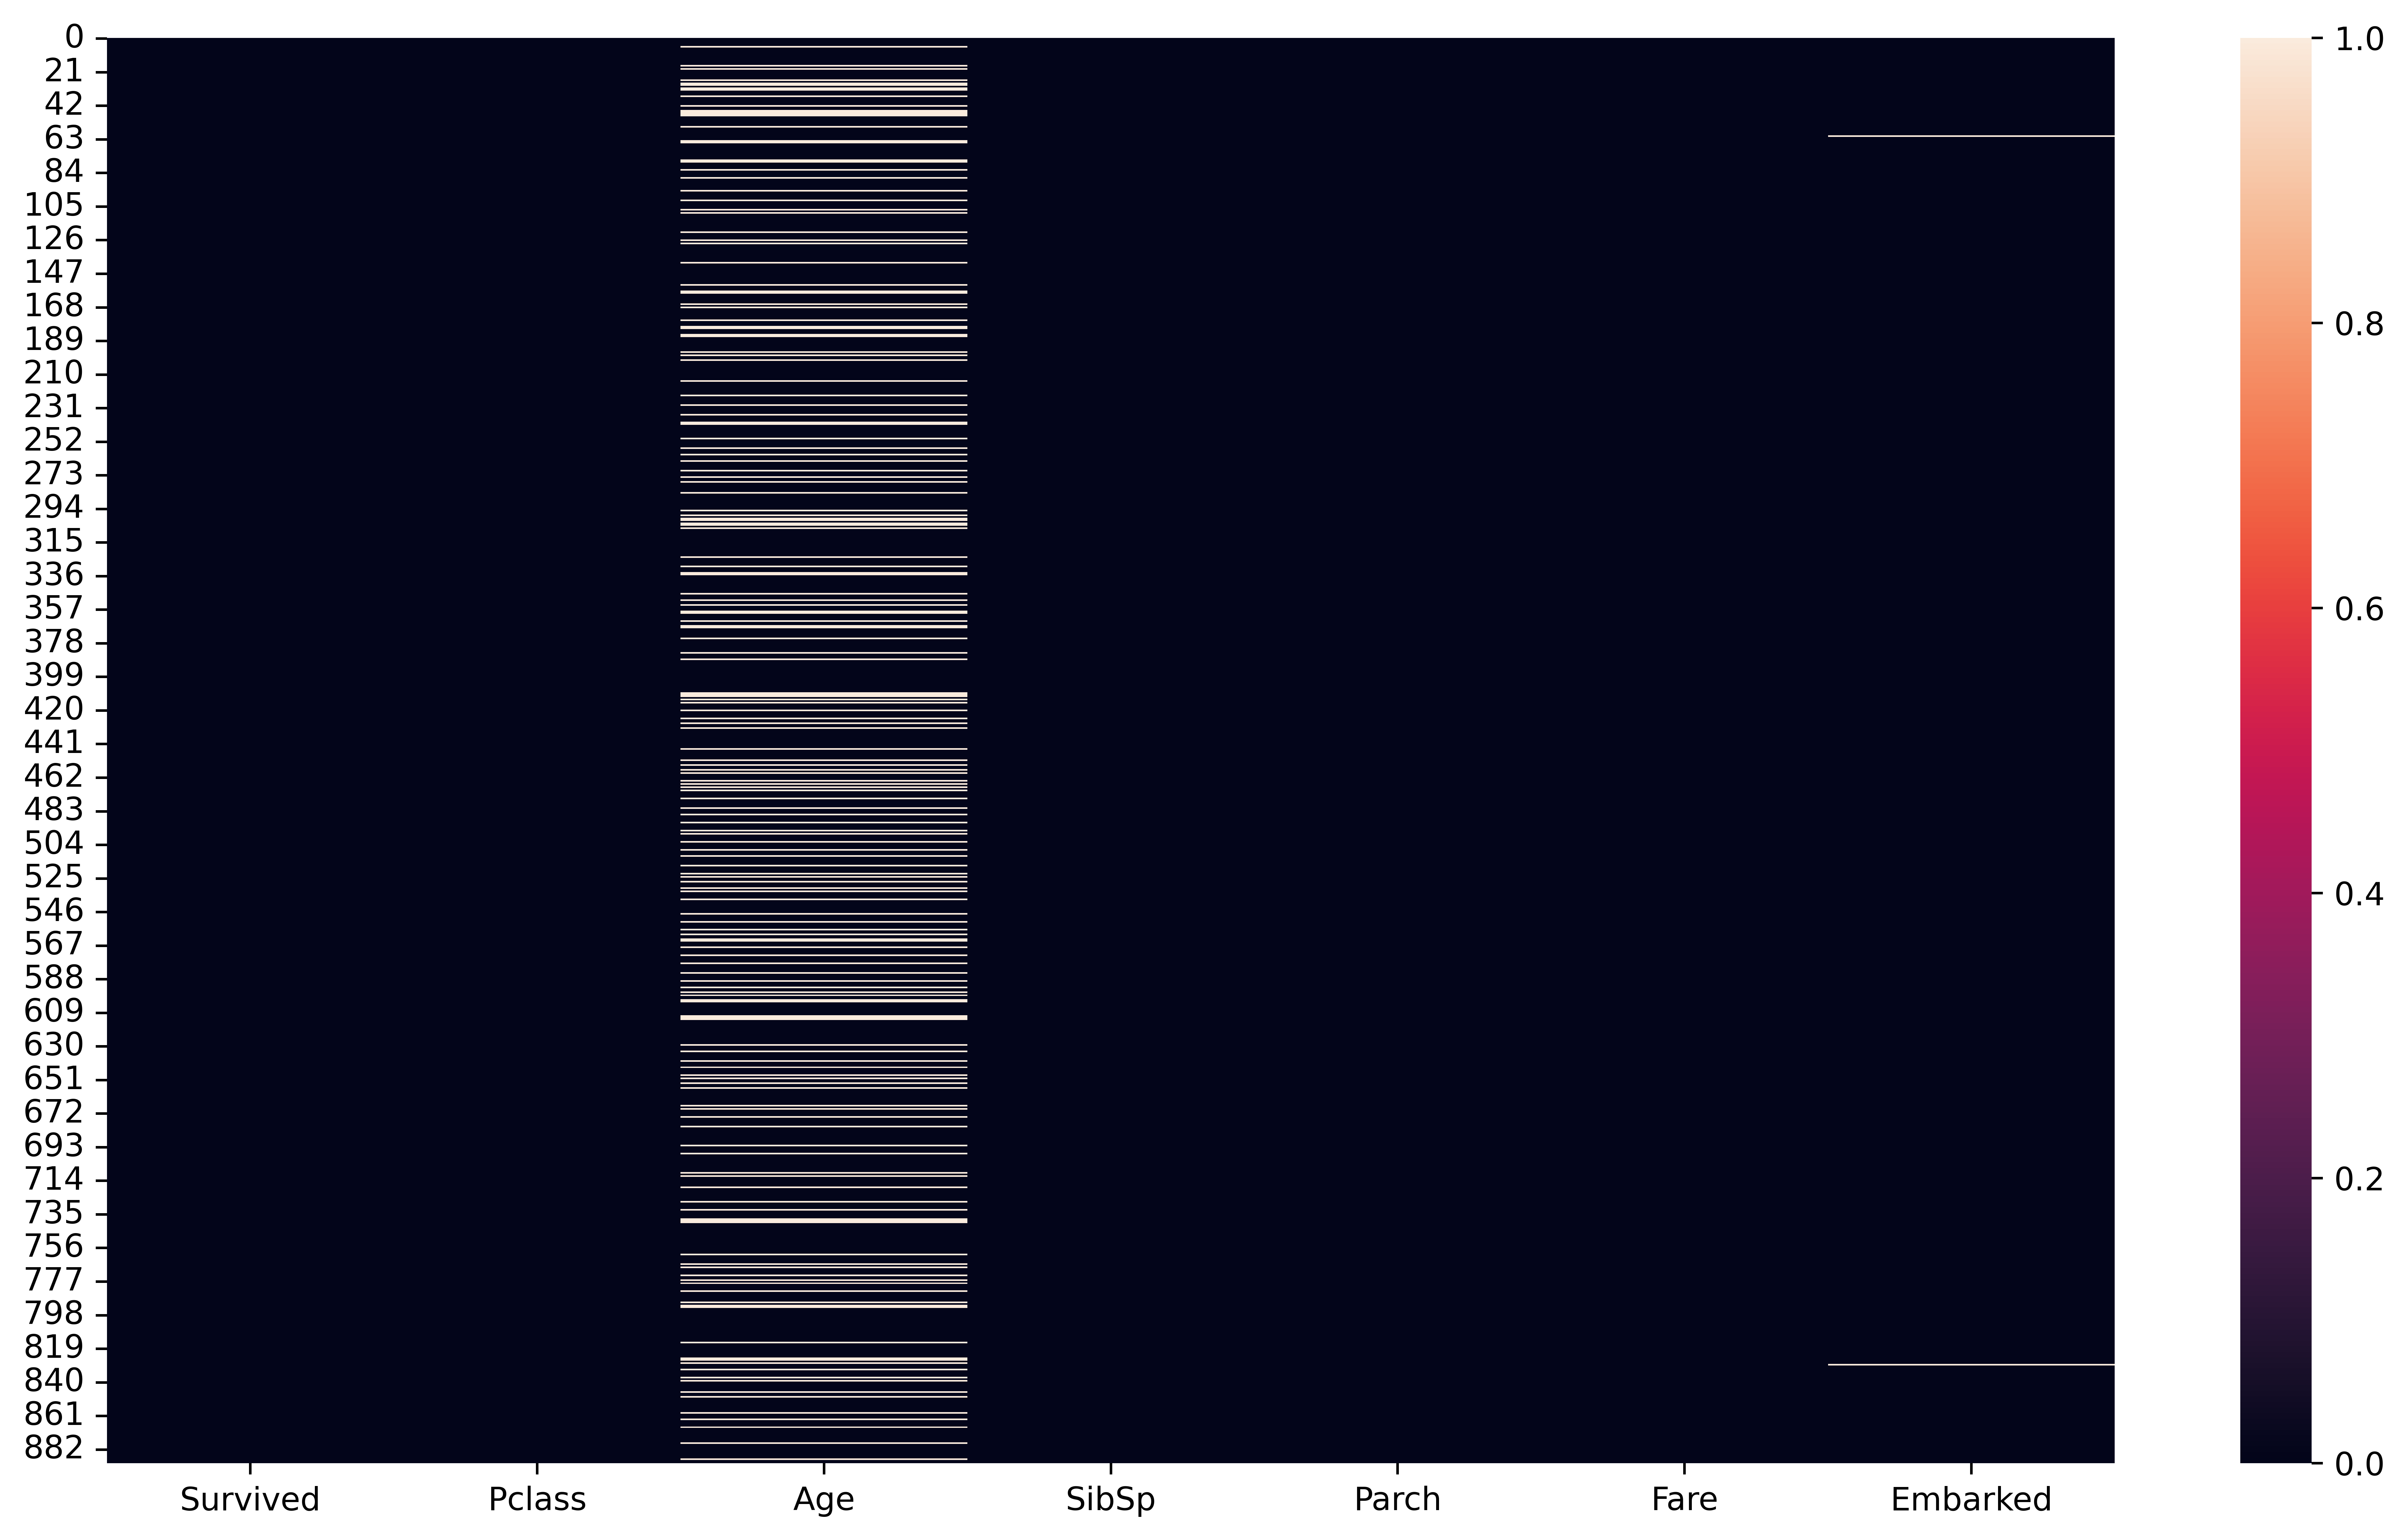

In [28]:
sn.heatmap(df.isna())

In [29]:
len(df)

891

In [30]:
for i in df.isna().sum():
  print((i/len(df))*100)

0.0
0.0
19.865319865319865
0.0
0.0
0.0
0.22446689113355783


array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

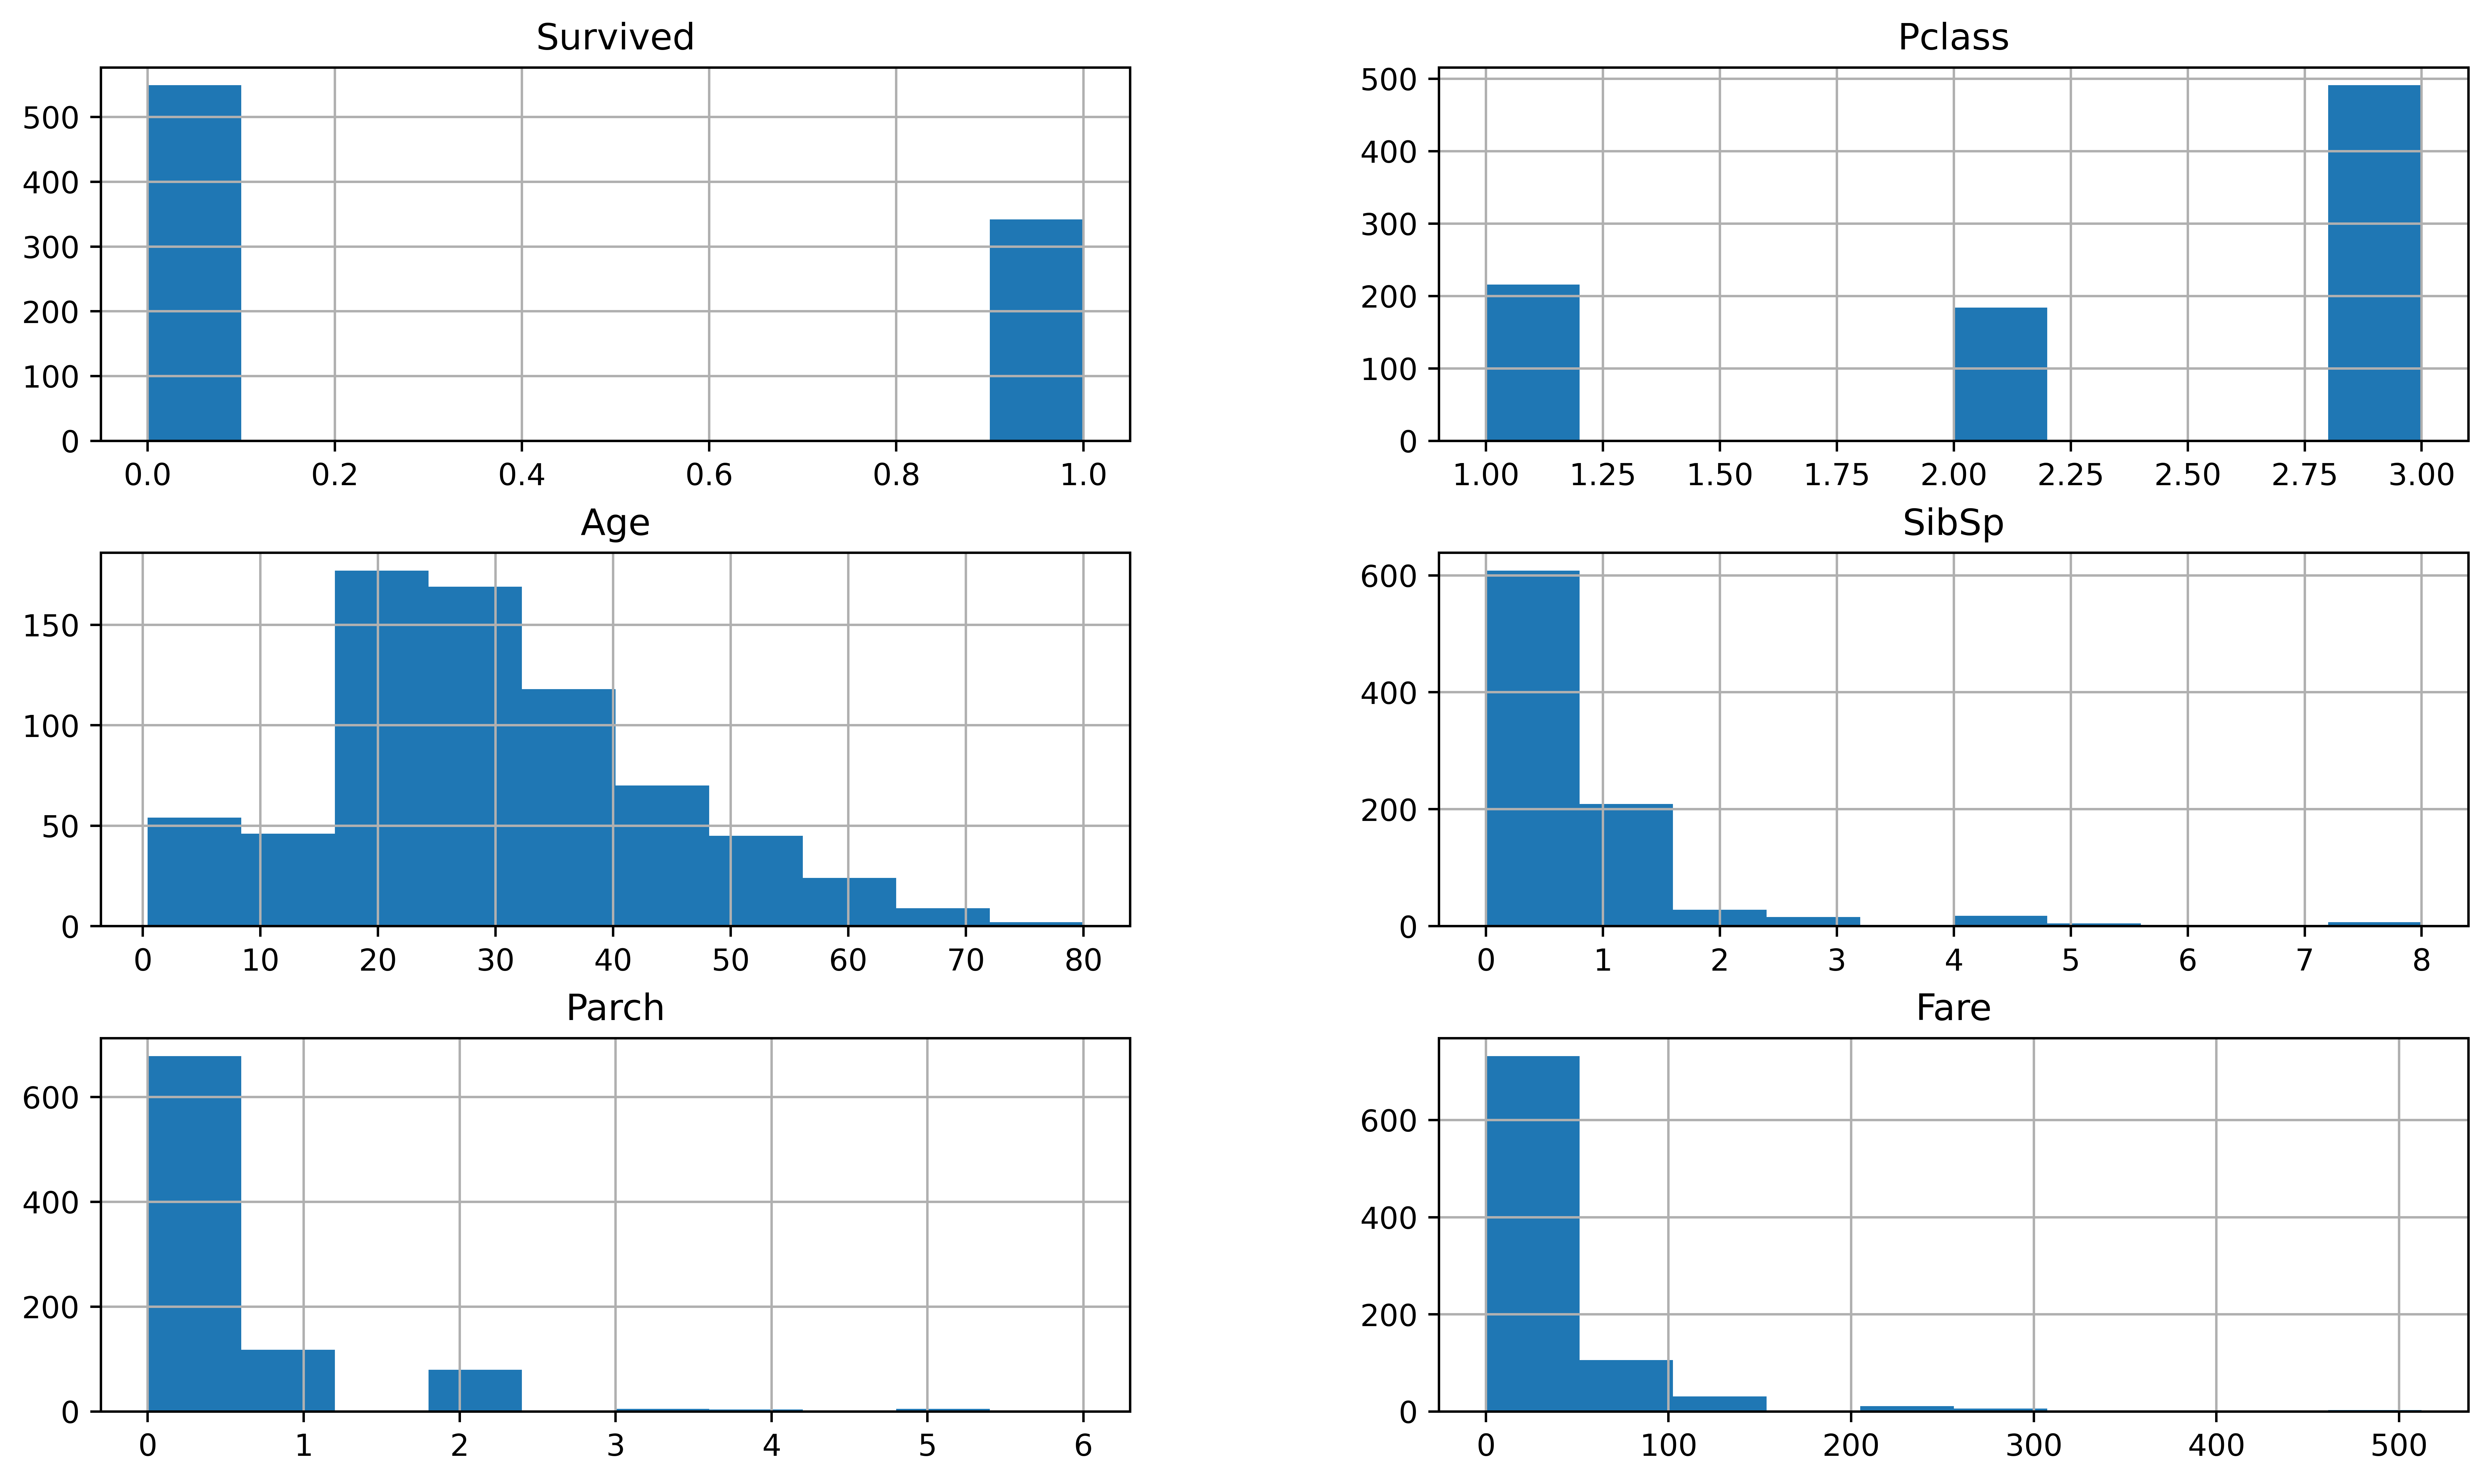

In [31]:
df.hist()

<Axes: >

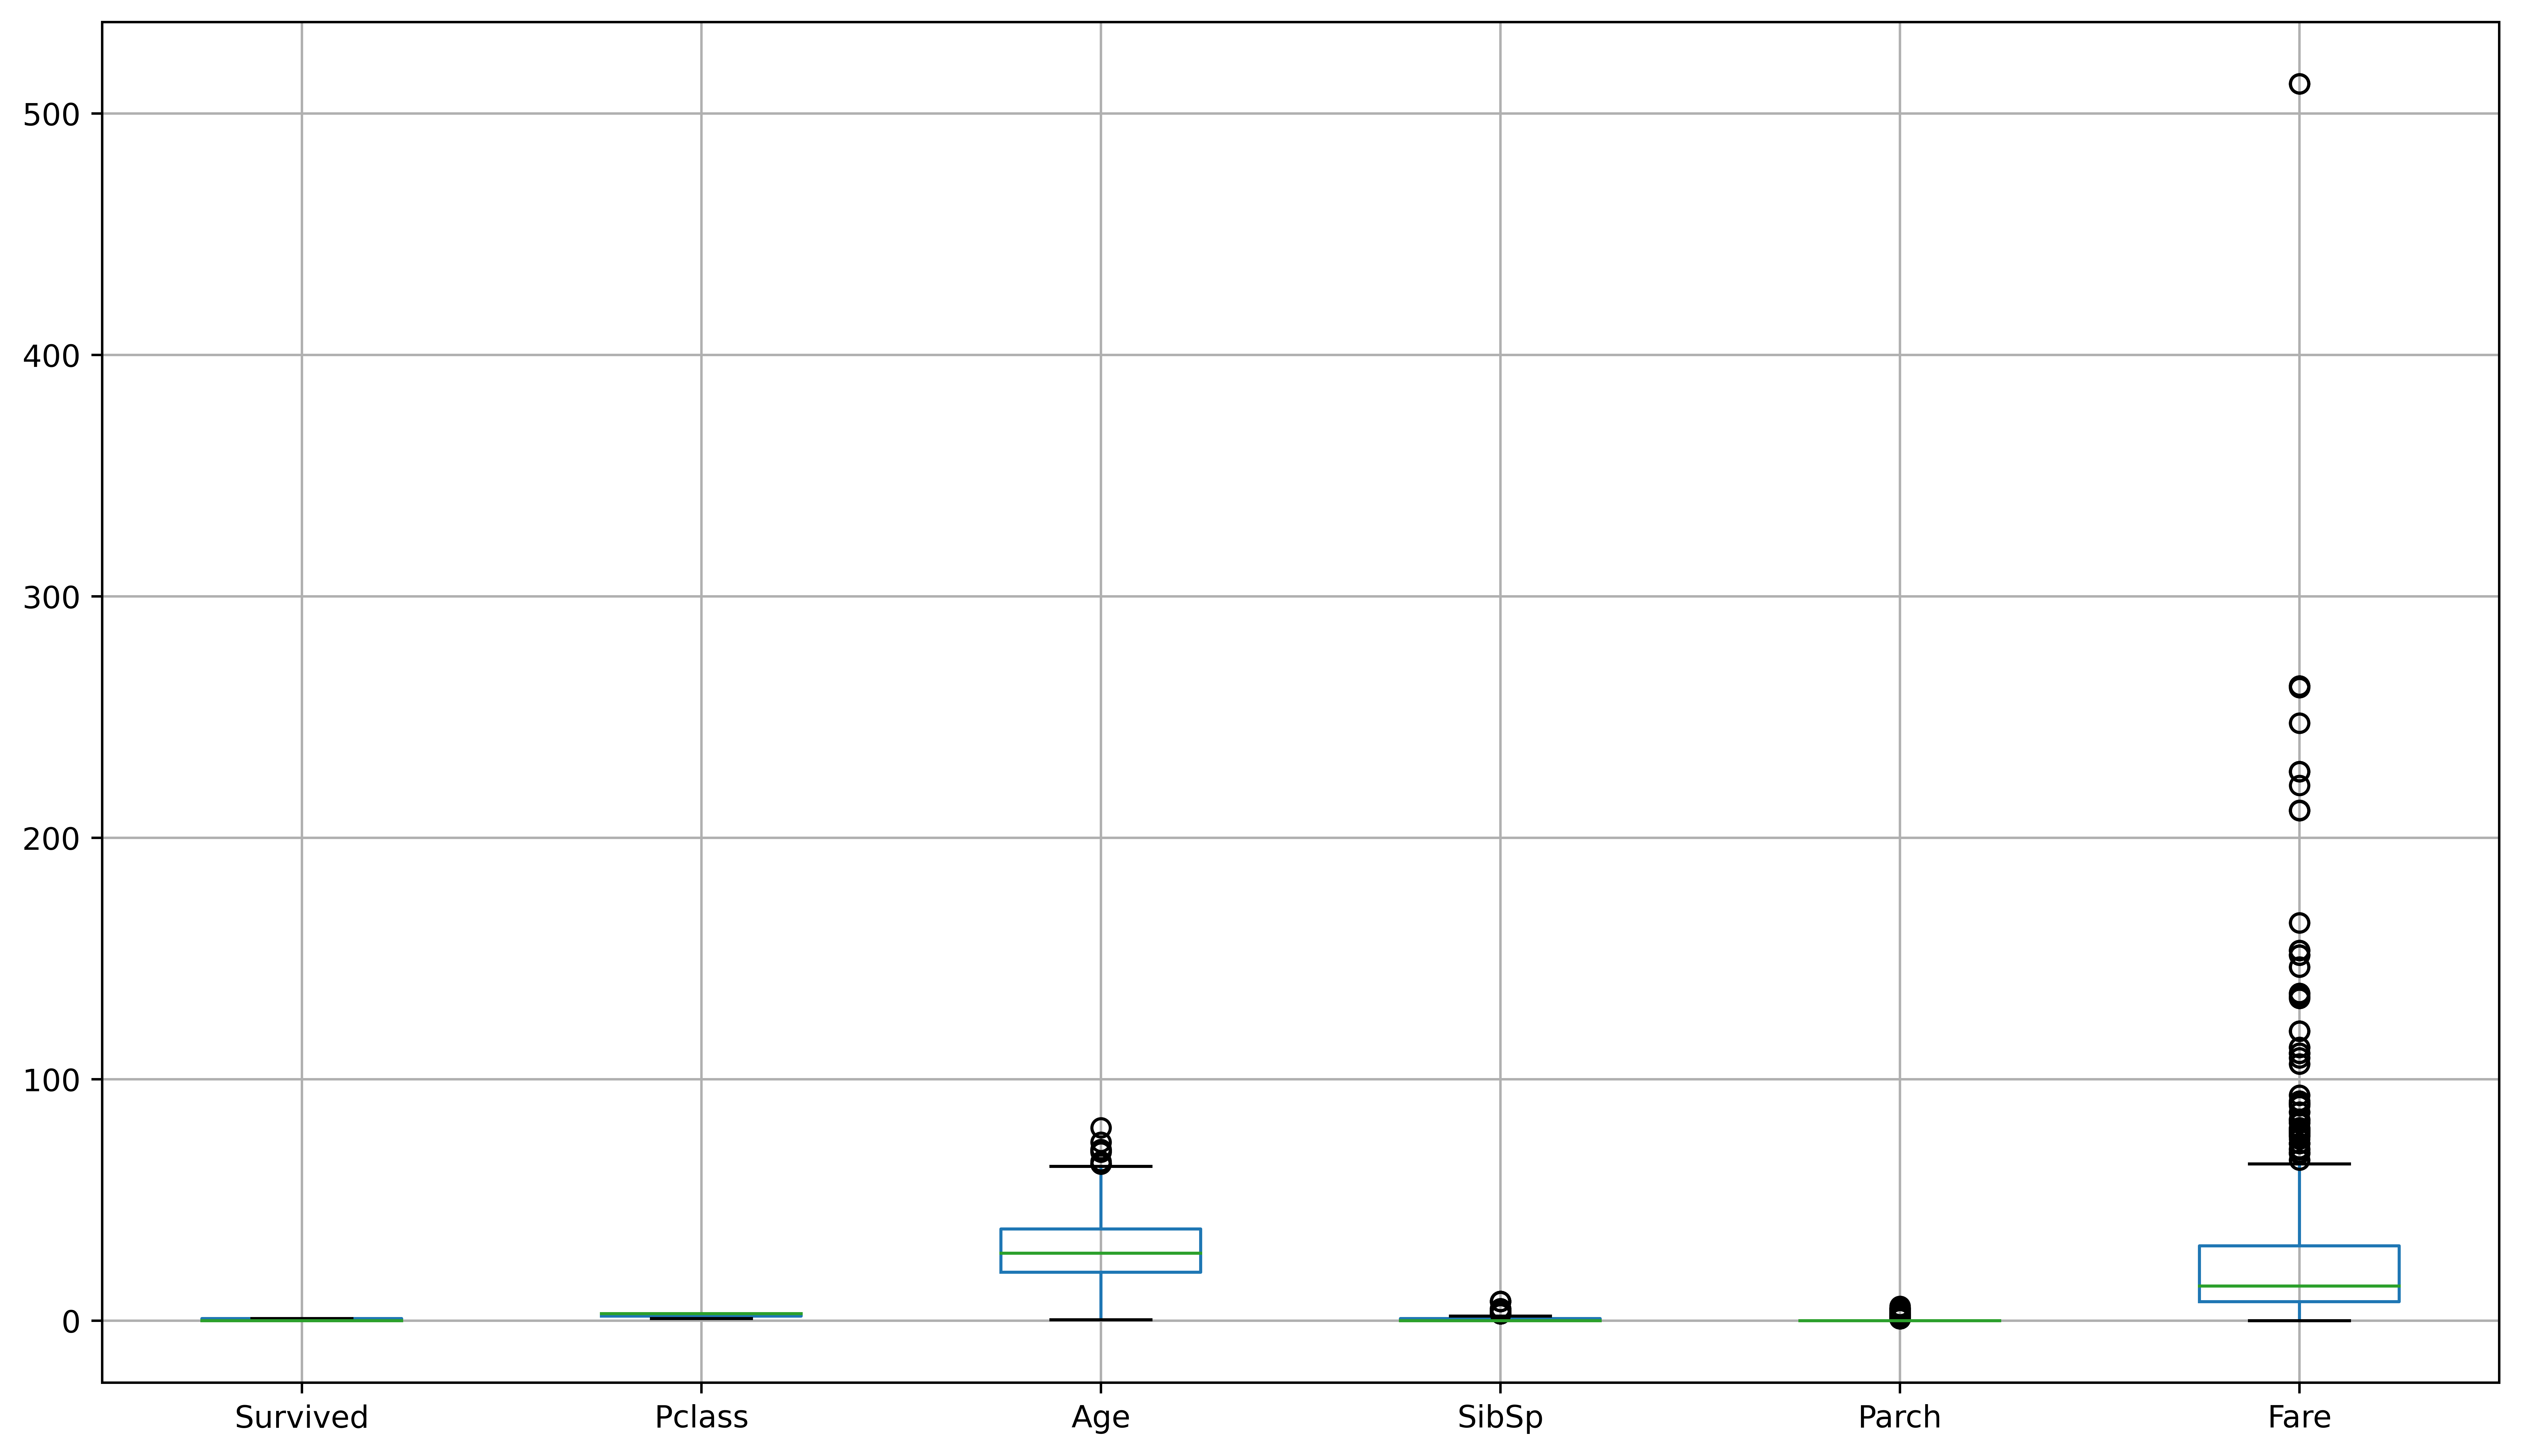

In [32]:
df.boxplot()

In [33]:
df['Age'].median()

28.0

In [34]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [35]:
df['Age'].isna().sum()

0

In [36]:
df_=pd.get_dummies(df)

In [37]:
df_=df_.astype(int)

In [38]:
df_

Survived  Pclass  Age  SibSp  Parch  Fare  Embarked_C  Embarked_Q  \
0           0       3   22      1      0     7           0           0   
1           1       1   38      1      0    71           1           0   
2           1       3   26      0      0     7           0           0   
3           1       1   35      1      0    53           0           0   
4           0       3   35      0      0     8           0           0   
..        ...     ...  ...    ...    ...   ...         ...         ...   
886         0       2   27      0      0    13           0           0   
887         1       1   19      0      0    30           0           0   
888         0       3   28      1      2    23           0           0   
889         1       1   26      0      0    30           1           0   
890         0       3   32      0      0     7           0           1   

     Embarked_S  
0             1  
1             0  
2             1  
3             1  
4             1  
..          ...  
886           1  
887           1  
888           1  
889           0  
890           0  

[891 rows x 9 columns]

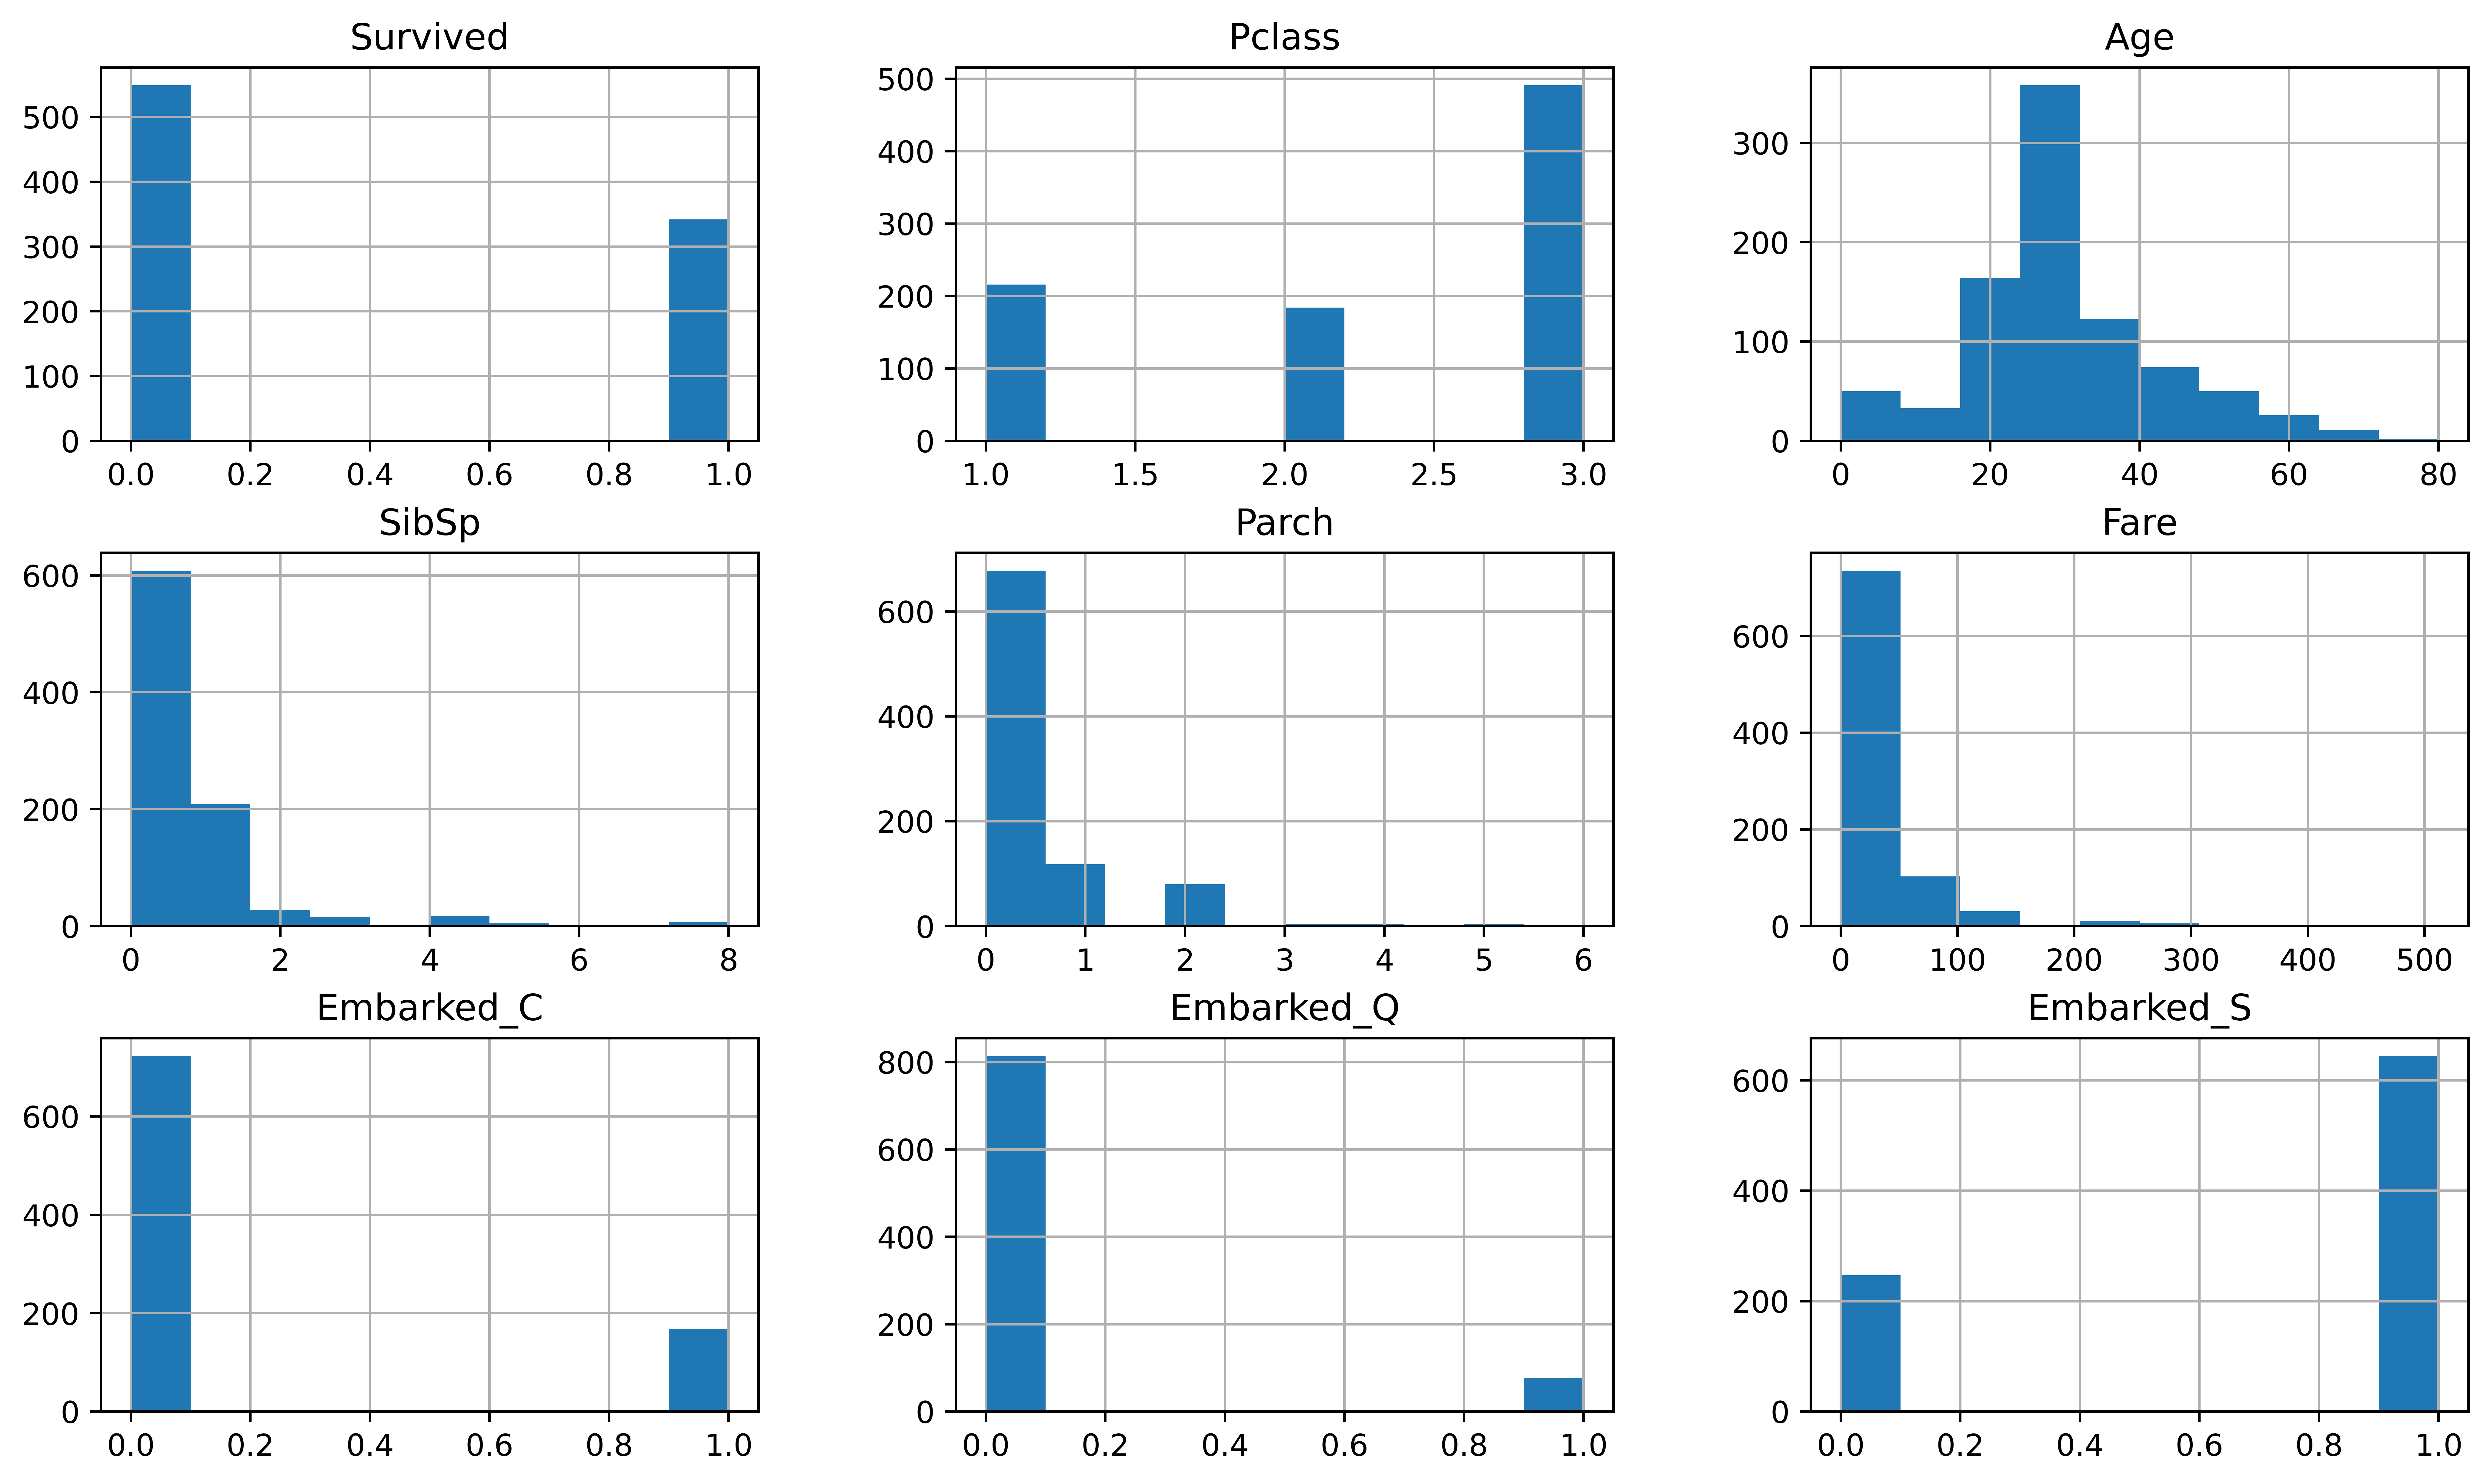

<Figure size 10080x5760 with 0 Axes>

In [39]:
df_.hist()
plt.show()
plt.tight_layout()

<Axes: >

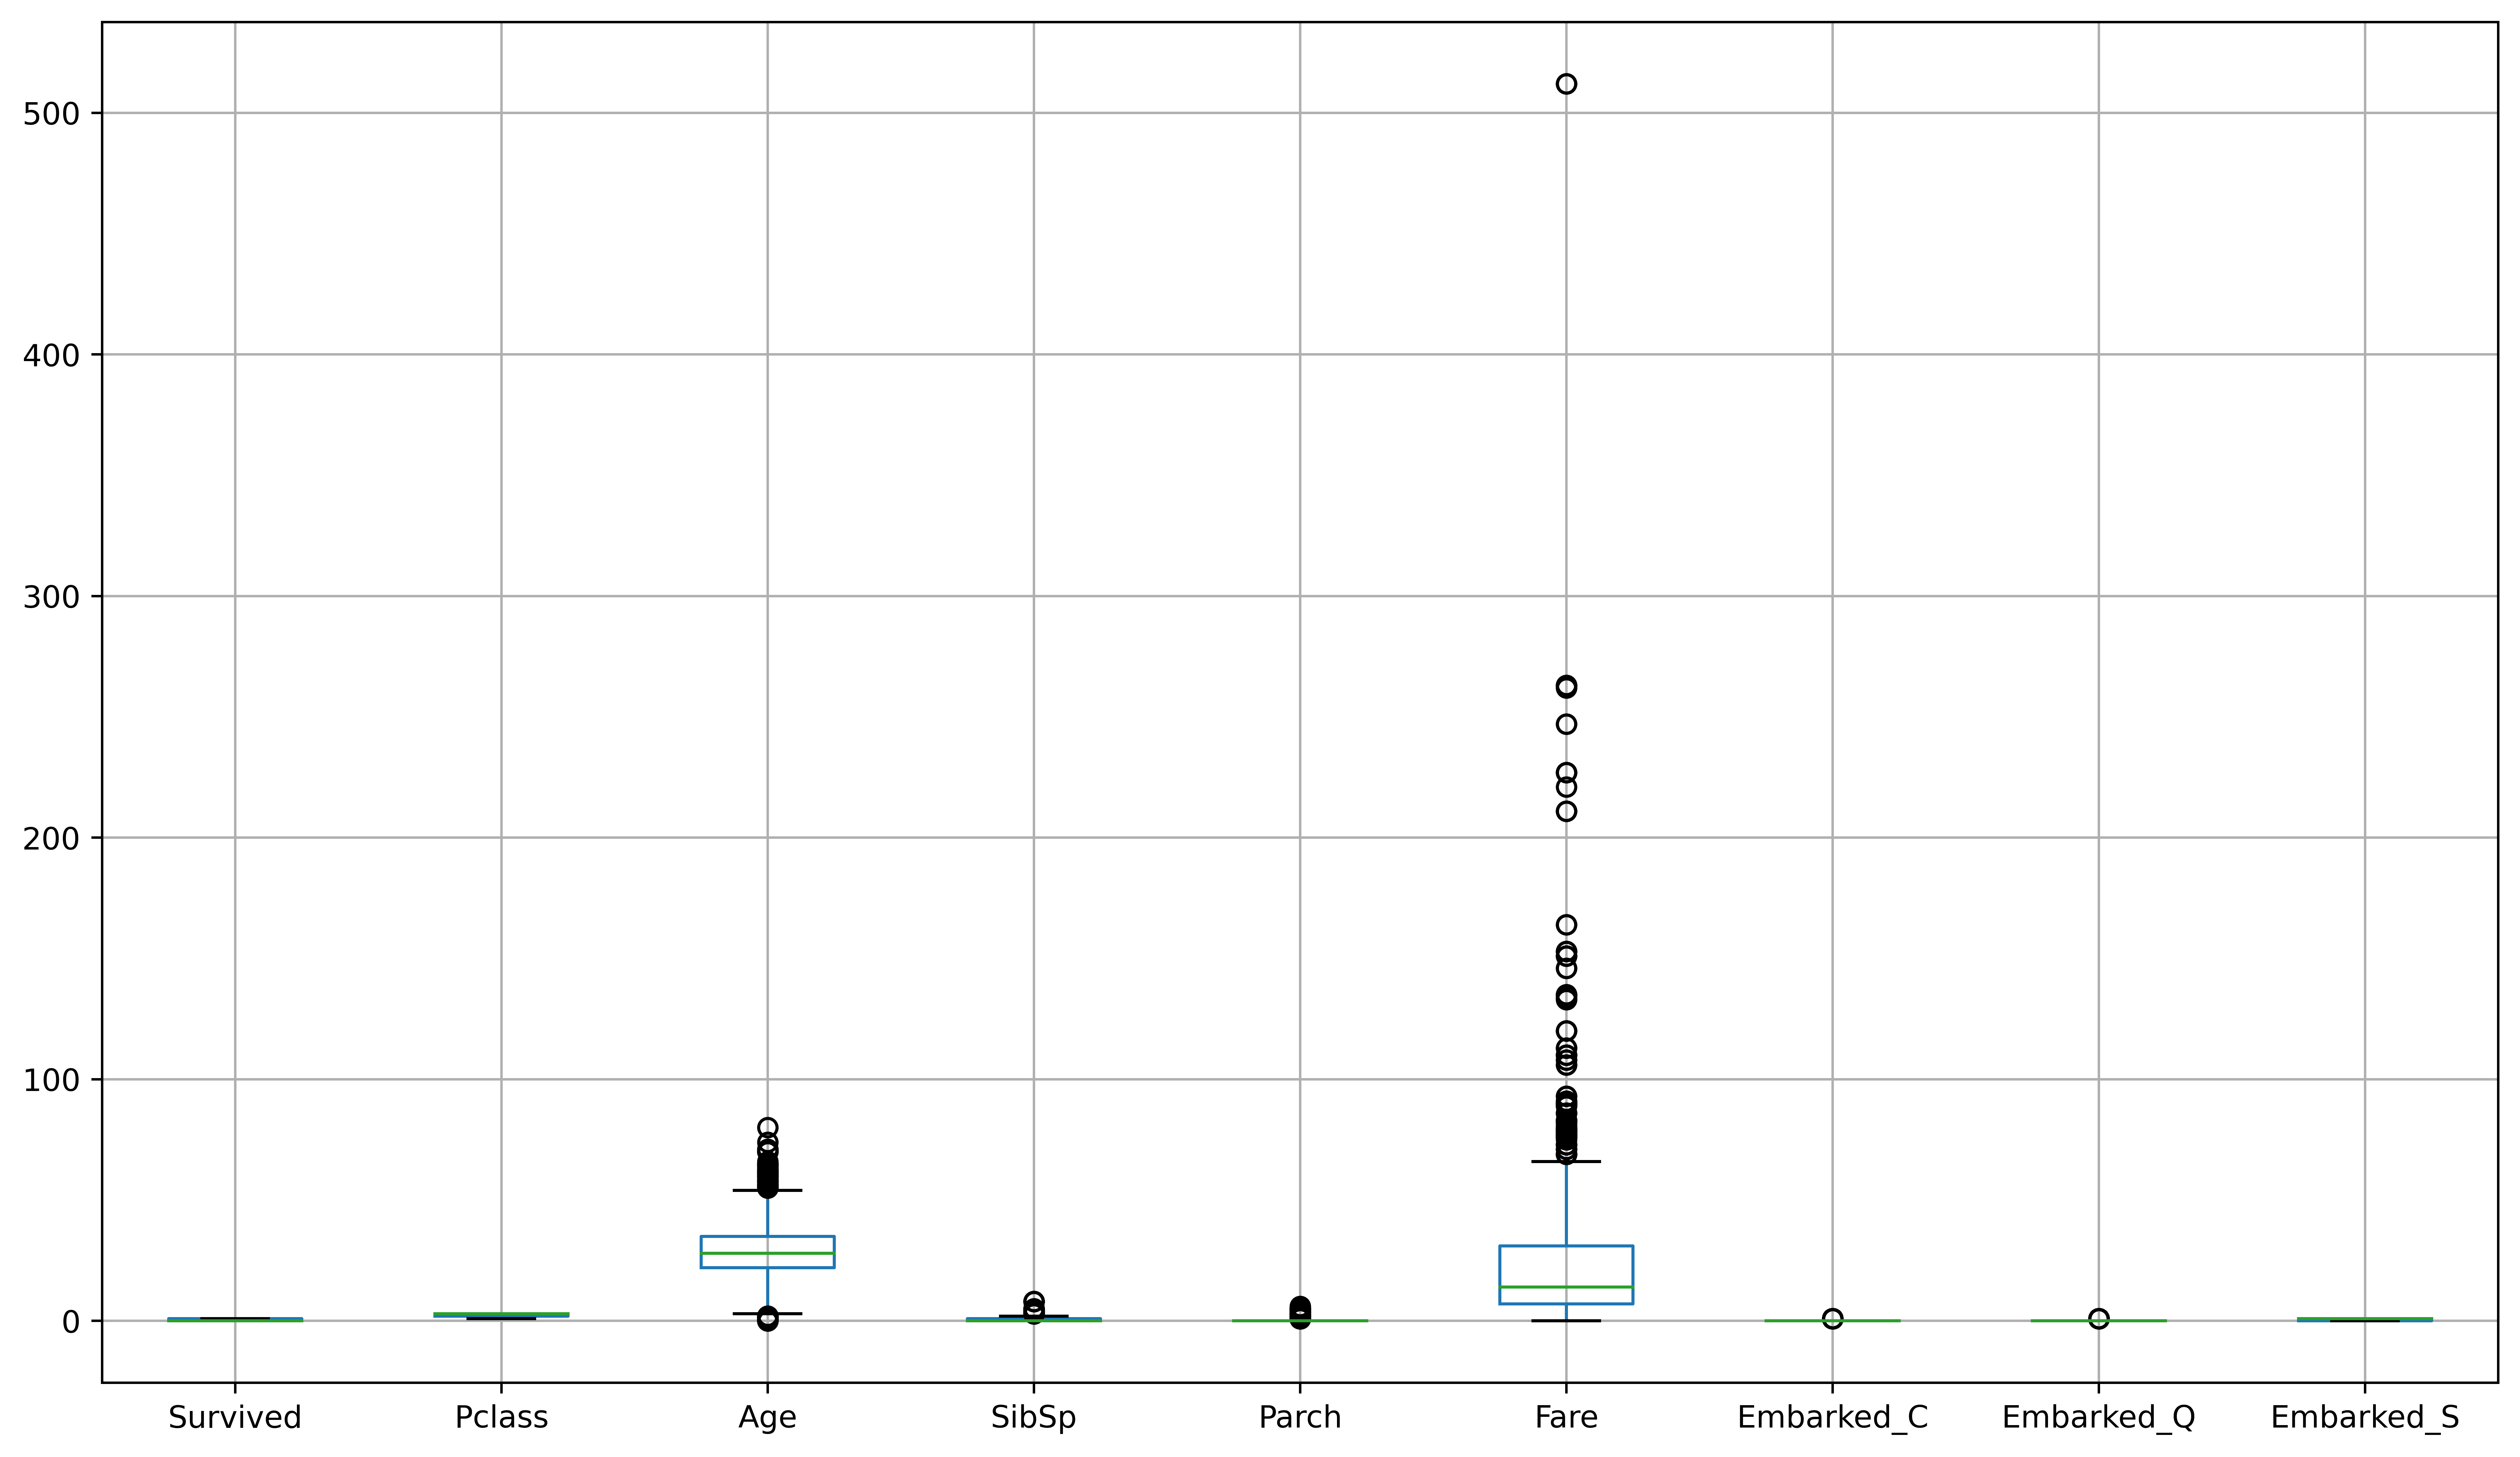

In [40]:
df_.boxplot()

In [41]:
sn.pairplot(df_)

In [42]:
df_.corr()

Survived    Pclass       Age     SibSp     Parch      Fare  \
Survived    1.000000 -0.338481 -0.064909 -0.035322  0.081629  0.257482   
Pclass     -0.338481  1.000000 -0.339999  0.083081  0.018443 -0.550553   
Age        -0.064909 -0.339999  1.000000 -0.233066 -0.172745  0.097064   
SibSp      -0.035322  0.083081 -0.233066  1.000000  0.414838  0.159506   
Parch       0.081629  0.018443 -0.172745  0.414838  1.000000  0.216252   
Fare        0.257482 -0.550553  0.097064  0.159506  0.216252  1.000000   
Embarked_C  0.168240 -0.243292  0.029732 -0.059528 -0.011069  0.269165   
Embarked_Q  0.003650  0.221009 -0.031479 -0.026354 -0.081228 -0.118319   
Embarked_S -0.155660  0.081720 -0.014176  0.070941  0.063036 -0.165803   

            Embarked_C  Embarked_Q  Embarked_S  
Survived      0.168240    0.003650   -0.155660  
Pclass       -0.243292    0.221009    0.081720  
Age           0.029732   -0.031479   -0.014176  
SibSp        -0.059528   -0.026354    0.070941  
Parch        -0.011069   -0.081228    0.063036  
Fare          0.269165   -0.118319   -0.165803  
Embarked_C    1.000000   -0.148258   -0.778359  
Embarked_Q   -0.148258    1.000000   -0.496624  
Embarked_S   -0.778359   -0.496624    1.000000

<Axes: >

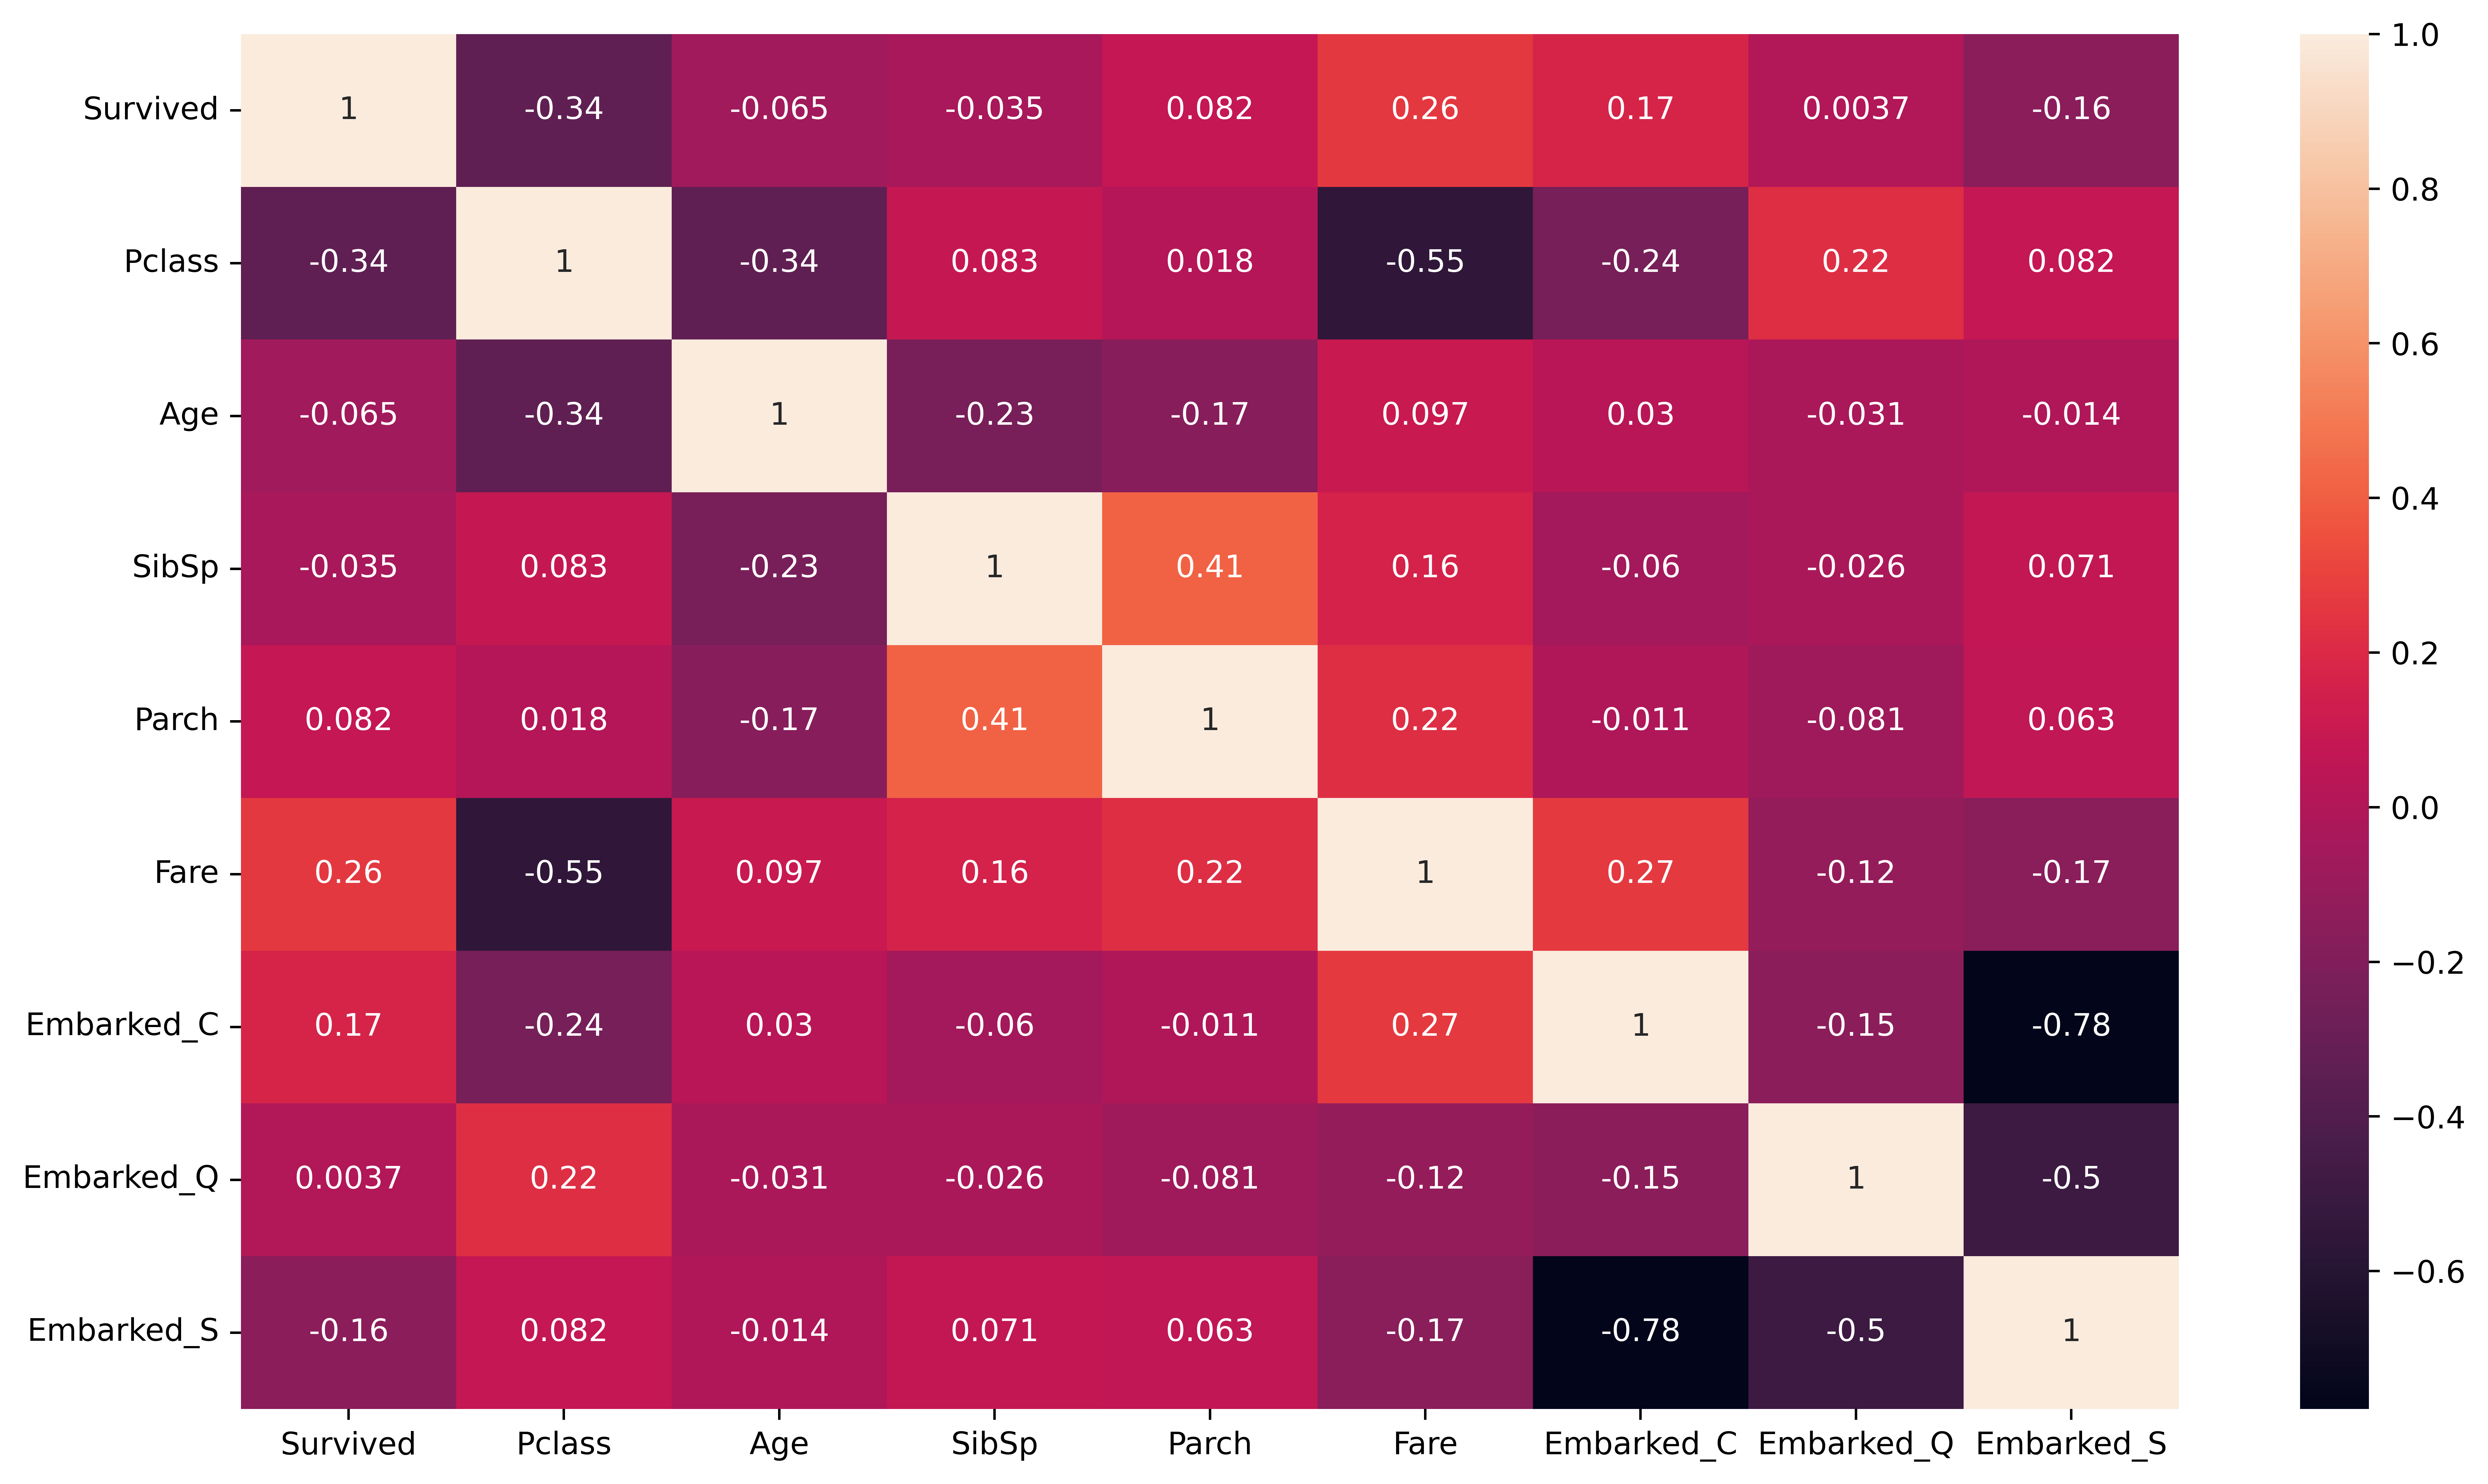

In [43]:
sn.heatmap(df_.corr(),annot=True)

In [44]:
x=df_.iloc[:,1:]

In [45]:
x

Pclass  Age  SibSp  Parch  Fare  Embarked_C  Embarked_Q  Embarked_S
0         3   22      1      0     7           0           0           1
1         1   38      1      0    71           1           0           0
2         3   26      0      0     7           0           0           1
3         1   35      1      0    53           0           0           1
4         3   35      0      0     8           0           0           1
..      ...  ...    ...    ...   ...         ...         ...         ...
886       2   27      0      0    13           0           0           1
887       1   19      0      0    30           0           0           1
888       3   28      1      2    23           0           0           1
889       1   26      0      0    30           1           0           0
890       3   32      0      0     7           0           1           0

[891 rows x 8 columns]

In [46]:
y=df['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [47]:
lr=LogisticRegression()
lr.fit(x,y)

LogisticRegression()

In [48]:
y_pred=lr.predict(x)

In [49]:
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,

In [50]:
y_pred_df=pd.DataFrame({'y':y,'y_pred':y_pred})

In [51]:
y_pred_df

y  y_pred
0    0       0
1    1       1
2    1       0
3    1       1
4    0       0
..  ..     ...
886  0       0
887  1       1
888  0       0
889  1       1
890  0       0

[891 rows x 2 columns]

In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_pred)
print (confusion_matrix)

[[485  64]
 [188 154]]


In [53]:
accuracy=(472+240)/(472+77+102+240)*100

In [54]:
accuracy

79.91021324354658

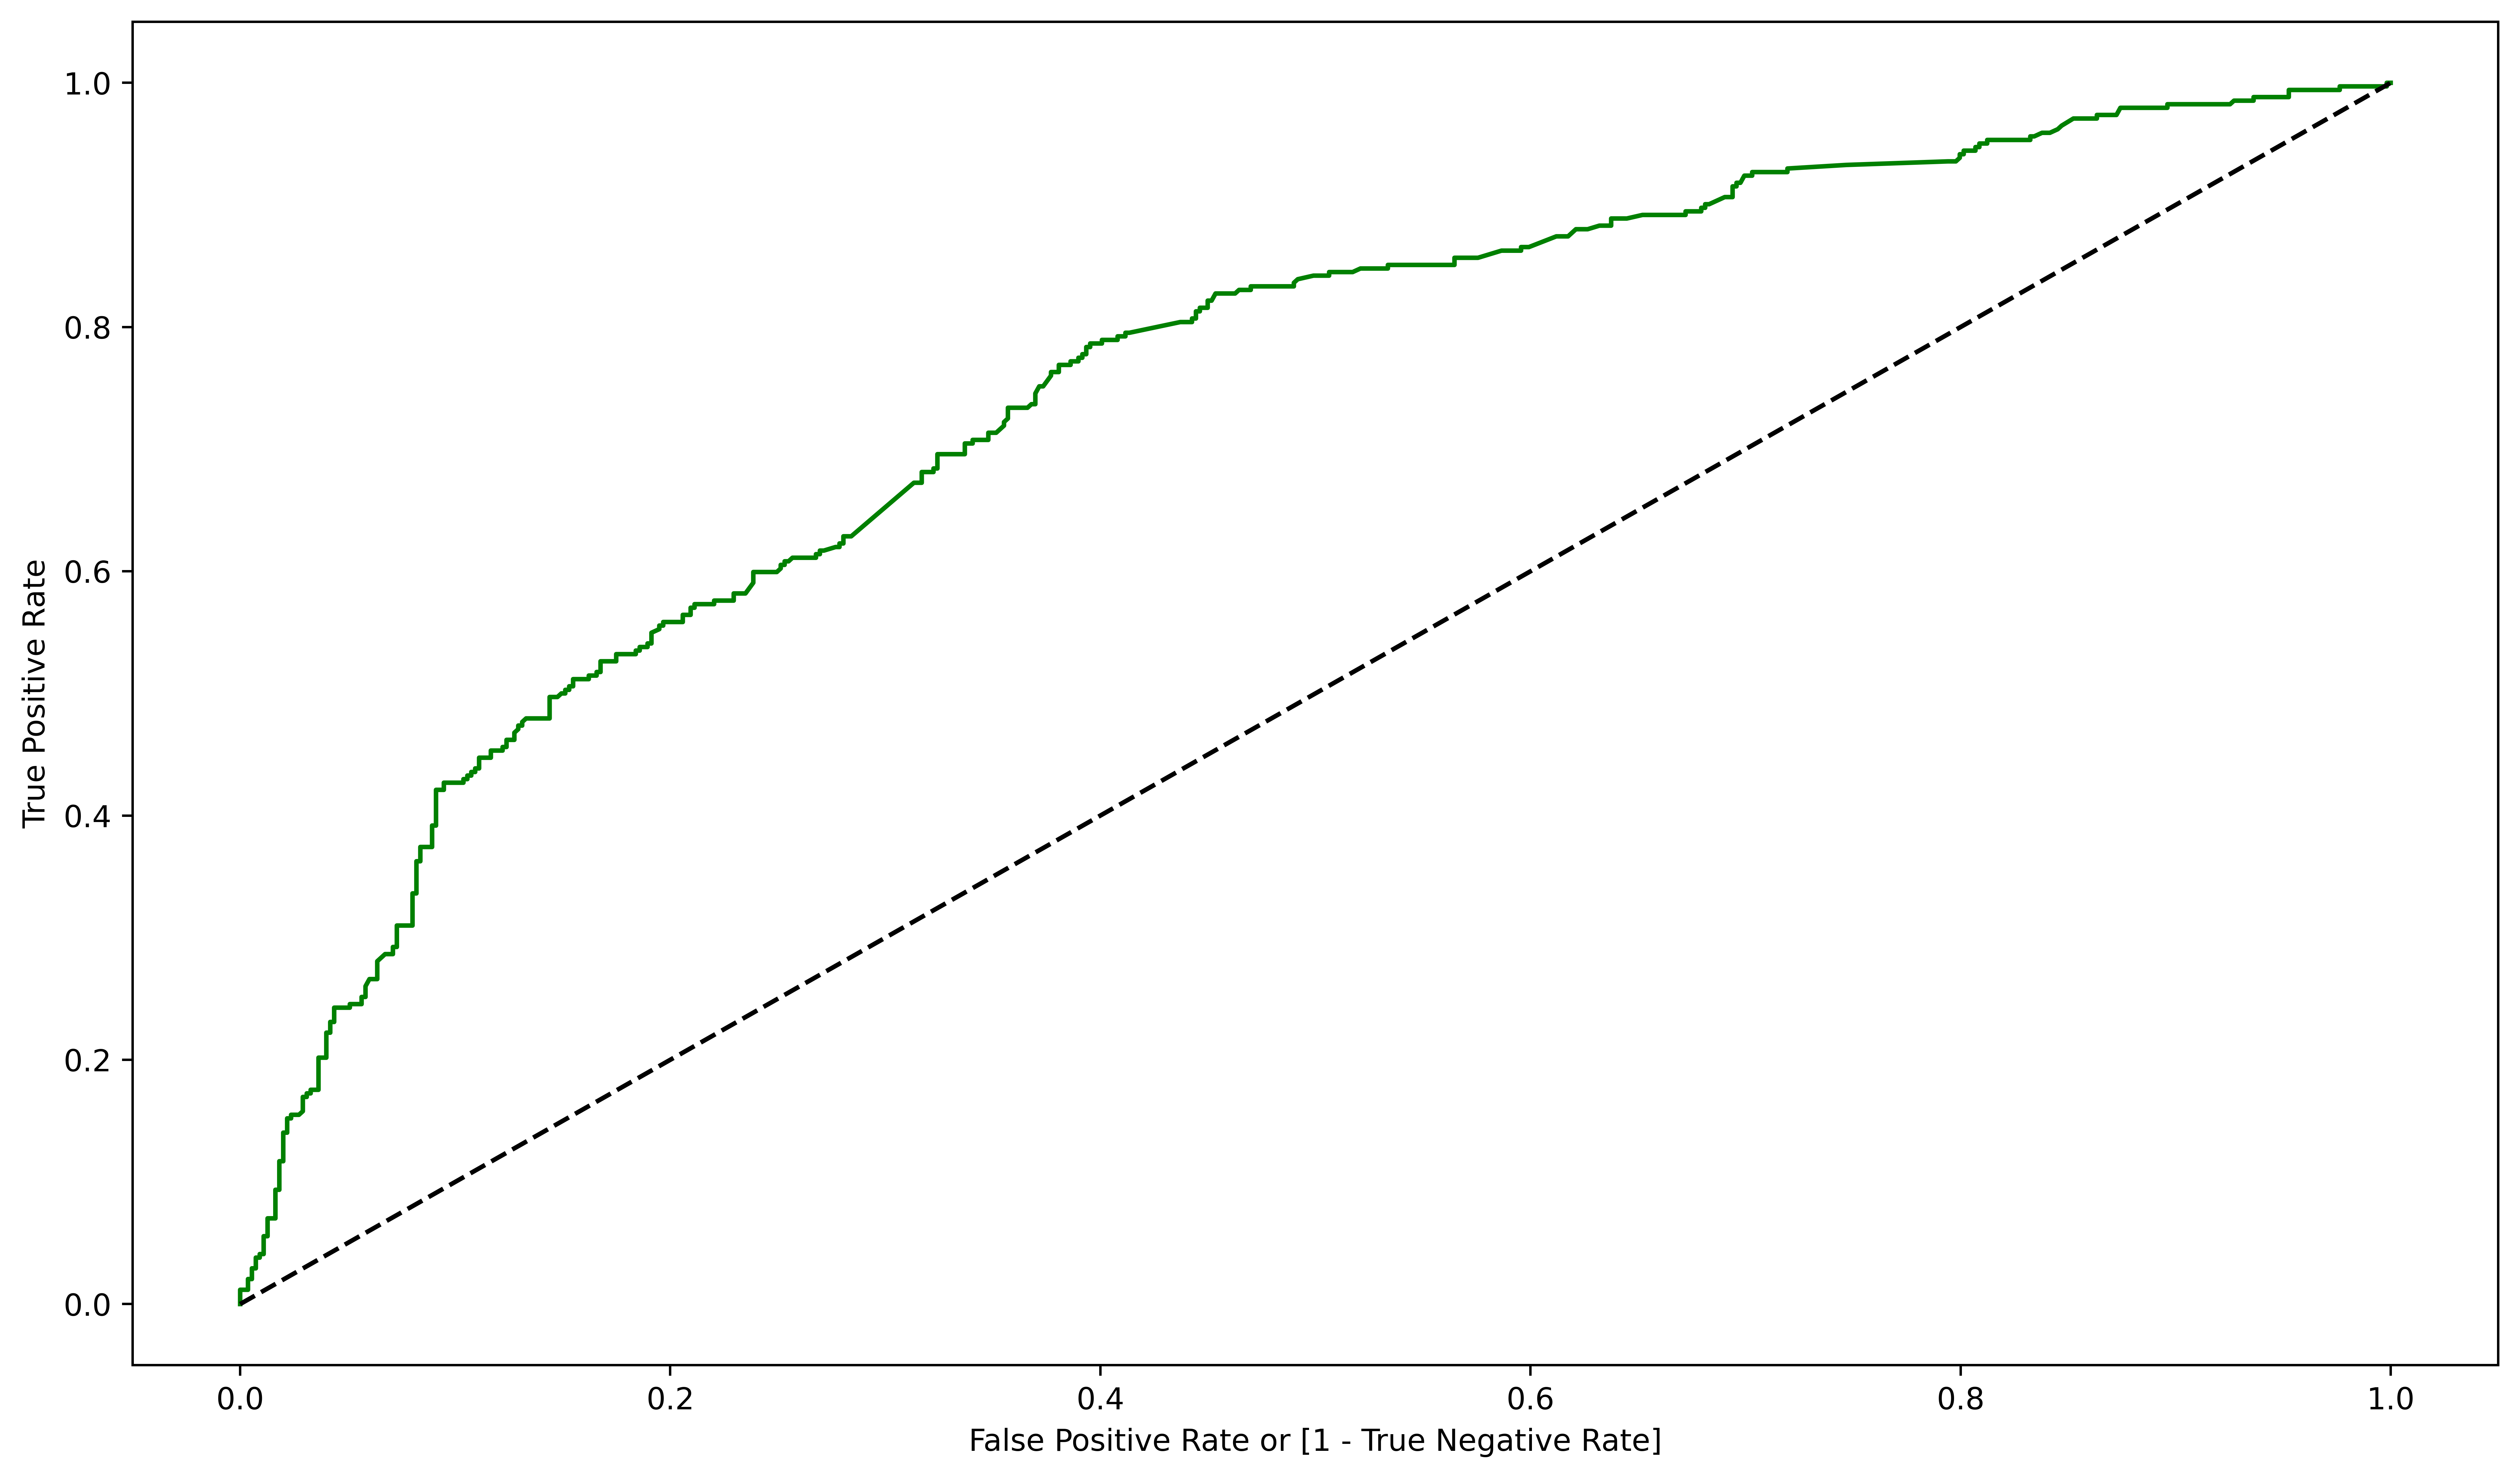

In [55]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y, lr.predict_proba(x)[:,1])
auc = roc_auc_score(y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='Green')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [56]:
auc

0.6668584028376953

In [ ]:
# Titanic_test

In [57]:
df=pd.read_csv('/content/Titanic_test.csv')

In [58]:
df

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0              330911    7.8292   NaN        Q  
1    female  47.0      1      0              363272    7.0000   NaN        S  
2      male  62.0      0      0              240276    9.6875   NaN        Q  
3      male  27.0      0      0              315154    8.6625   NaN        S  
4    female  22.0      1      1             3101298   12.2875   NaN        S  
..      ...   ...    ...    ...                 ...       ...   ...      ...  
413    male   NaN      0      0           A.5. 3236    8.0500   NaN        S  
414  female  39.0      0      0            PC 17758  108.9000  C105        C  
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416    male   NaN      0      0              359309    8.0500   NaN        S  
417    male   NaN      1      1                2668   22.3583   NaN        C  

[418 rows x 11 columns]

In [59]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin','Sex'],inplace=True)

In [60]:
df

Pclass   Age  SibSp  Parch      Fare Embarked
0         3  34.5      0      0    7.8292        Q
1         3  47.0      1      0    7.0000        S
2         2  62.0      0      0    9.6875        Q
3         3  27.0      0      0    8.6625        S
4         3  22.0      1      1   12.2875        S
..      ...   ...    ...    ...       ...      ...
413       3   NaN      0      0    8.0500        S
414       1  39.0      0      0  108.9000        C
415       3  38.5      0      0    7.2500        S
416       3   NaN      0      0    8.0500        S
417       3   NaN      1      1   22.3583        C

[418 rows x 6 columns]

In [63]:
df.isna().sum()

Pclass       0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [64]:
df.shape

(418, 6)

In [65]:
df.dropna(inplace=True)

In [67]:
df_=pd.get_dummies(df).astype(int)
df_

Pclass  Age  SibSp  Parch  Fare  Embarked_C  Embarked_Q  Embarked_S
0         3   34      0      0     7           0           1           0
1         3   47      1      0     7           0           0           1
2         2   62      0      0     9           0           1           0
3         3   27      0      0     8           0           0           1
4         3   22      1      1    12           0           0           1
..      ...  ...    ...    ...   ...         ...         ...         ...
409       3    3      1      1    13           0           0           1
411       1   37      1      0    90           0           1           0
412       3   28      0      0     7           0           0           1
414       1   39      0      0   108           1           0           0
415       3   38      0      0     7           0           0           1

[331 rows x 8 columns]

In [68]:
lr.predict(df_)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,